# View Calspec SED Colors through Johnson Filters

- Author Sylvie Dagoret-Campagne
- Creation : October 8th 2019
- Update : October 23th 2019
- Update : April 20th 2020 for package PhotomCorrectAuxTel
- Update December 14th 2021 : Obliged to catch exception for partially empty SED on some wavelength range --> put NAN

- Last verficiation : December 14th 2021 : --> OK

1) Rescale the SED renormalised to a magnitude 10

1) Compute the Colors of the star


Output file : **table_summary_allcalspec_torenorm.fits** that contain colors V - I required by **5_SelectFiewColors/ipynb**


In [1]:
import os
import numpy as np

In [2]:
from astropy.table import Table
from astropy.io import fits
from astropy.io import ascii

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.dates as mdates
from matplotlib import gridspec
%matplotlib inline

In [4]:
import pysynphot as S

In [5]:
pysynphot_root_path=os.environ['PYSYN_CDBS']
path_sed_calspec=os.path.join(pysynphot_root_path,'calspec')

In [6]:
plt.rcParams["axes.labelsize"]="large"
plt.rcParams["axes.linewidth"]=2.0
plt.rcParams["xtick.major.size"]=8
plt.rcParams["ytick.major.size"]=8
plt.rcParams["ytick.minor.size"]=5
plt.rcParams["xtick.labelsize"]="large"
plt.rcParams["ytick.labelsize"]="large"

plt.rcParams["figure.figsize"]=(16,10)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.titleweight'] = 'bold'
#plt.rcParams['axes.facecolor'] = 'blue'
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['lines.markeredgewidth'] = 0.3 # the line width around the marker symbol
plt.rcParams['lines.markersize'] = 5  # markersize, in points
plt.rcParams['grid.alpha'] = 0.75 # transparency, between 0.0 and 1.0
plt.rcParams['grid.linestyle'] = '-' # simple line
plt.rcParams['grid.linewidth'] = 0.4 # in points
plt.rcParams['font.size'] = 13

In [7]:
from datetime import datetime,date
today = date.today()
string_date=today.strftime("%Y-%m-%d")

# Configuration

## Config PySynPhot

In [8]:
S.refs.showref()

graphtable: /Users/sylvie/MacOSX/External/PySynPhotData/grp/redcat/trds/mtab/57g1733im_tmg.fits
 comptable: /Users/sylvie/MacOSX/External/PySynPhotData/grp/redcat/trds/mtab/5as18041m_tmc.fits
thermtable: /Users/sylvie/MacOSX/External/PySynPhotData/grp/redcat/trds/mtab/3241637sm_tmt.fits
      area: 45238.93416
   waveset: Min: 500, Max: 26000, Num: 10000, Delta: None, Log: True


In [9]:
S.refs.setref(area=1.0) # surface set to 1 cm2

In [10]:
S.refs.showref()

graphtable: /Users/sylvie/MacOSX/External/PySynPhotData/grp/redcat/trds/mtab/57g1733im_tmg.fits
 comptable: /Users/sylvie/MacOSX/External/PySynPhotData/grp/redcat/trds/mtab/5as18041m_tmc.fits
thermtable: /Users/sylvie/MacOSX/External/PySynPhotData/grp/redcat/trds/mtab/3241637sm_tmt.fits
      area: 1.0
   waveset: Min: 500, Max: 26000, Num: 10000, Delta: None, Log: True


# Read the Table

In [11]:
t=Table.read('table_summary_allcalspec.fits')

In [12]:
t.show_in_notebook()  

idx,OBJNAME,RA,DEC,SP_TYPE,SP_QUAL,magU,magB,magV,magR,magI,FILES
0,109VIR,221.562,1.893,A0IIInn,C,3.690,3.720,3.730,3.660,3.680,109vir_stis_002.fits
1,10LAC,339.815,39.050,O9V,C,3.650,4.670,4.880,4.980,5.190,10lac_stis_005.fits
2,16CYGB,295.455,50.525,--,--,--,--,--,--,--,16cygb_stis_002.fits
3,18SCO,243.905,-8.369,G2Va,B,--,6.150,5.500,--,--,18sco_stis_002.fits
4,HD172167,279.235,38.784,A0Va,C,0.030,0.030,0.030,0.070,0.100,alpha_lyr_stis_010.fits
5,BD11D3759,218.570,-12.520,M3.5V,C,14.041,12.915,11.317,10.093,8.473,bd11d3759_stis_002.fits
6,ETA1DOR,91.539,-66.040,A0V,C,--,5.679,5.690,--,--,eta1dor_stis_002.fits
7,FEIGE110,349.993,-5.166,sdO8VIIIHe5,B,10.360,11.450,11.500,11.970,12.145,feige110_stisnic_008.fits
8,FEIGE34,159.903,43.103,sdOp,D,9.613,10.910,11.140,11.319,11.464,feige34_stis_006.fits
9,FEIGE66,189.348,25.067,sdB1(k),C,9.117,10.260,10.590,10.642,10.809,feige66_002.fits


In [13]:
NBOBJ=len(t)

In [14]:
NBFILES=len(t)

In [15]:
#FLAG_VISIBILITY=[True,True,True,False,True,False,True,False,False,True,False,False,False,True,True,False,True,True,True]

In [16]:
FLAG_VISIBILITY= [True] * NBOBJ

In [17]:
# wavelength bin colors
jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=NBFILES)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(np.arange(NBFILES), alpha=1)

Warning, 26 of 6260 bins contained negative fluxes; they have been set to zero.


/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_61119/283760779.py:16: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  label=str(t["OBJNAME"][idx]) +" ( "+ str(t["SP_TYPE"][idx]) +" )" + "magV = {:1.2f}".format(magV)


Warning, 27 of 6262 bins contained negative fluxes; they have been set to zero.
Warning, 27 of 1933 bins contained negative fluxes; they have been set to zero.
Warning, 17 of 6234 bins contained negative fluxes; they have been set to zero.
Warning, 1 of 6256 bins contained negative fluxes; they have been set to zero.
Warning, 29 of 6262 bins contained negative fluxes; they have been set to zero.


/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_61119/283760779.py:16: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  label=str(t["OBJNAME"][idx]) +" ( "+ str(t["SP_TYPE"][idx]) +" )" + "magV = {:1.2f}".format(magV)


Warning, 64 of 6262 bins contained negative fluxes; they have been set to zero.
Warning, 62 of 6262 bins contained negative fluxes; they have been set to zero.
Warning, 34 of 7206 bins contained negative fluxes; they have been set to zero.
Warning, 6 of 7206 bins contained negative fluxes; they have been set to zero.
Warning, 18 of 6261 bins contained negative fluxes; they have been set to zero.


/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_61119/283760779.py:16: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  label=str(t["OBJNAME"][idx]) +" ( "+ str(t["SP_TYPE"][idx]) +" )" + "magV = {:1.2f}".format(magV)


Warning, 47 of 7207 bins contained negative fluxes; they have been set to zero.
Warning, 30 of 6673 bins contained negative fluxes; they have been set to zero.
Warning, 46 of 6262 bins contained negative fluxes; they have been set to zero.
Warning, 64 of 7206 bins contained negative fluxes; they have been set to zero.
Warning, 28 of 6262 bins contained negative fluxes; they have been set to zero.
Warning, 9 of 6261 bins contained negative fluxes; they have been set to zero.
Warning, 33 of 7206 bins contained negative fluxes; they have been set to zero.
Warning, 57 of 7167 bins contained negative fluxes; they have been set to zero.
Warning, 26 of 6260 bins contained negative fluxes; they have been set to zero.
Warning, 5 of 6262 bins contained negative fluxes; they have been set to zero.
Warning, 12 of 7207 bins contained negative fluxes; they have been set to zero.
Warning, 1 of 2784 bins contained negative fluxes; they have been set to zero.
Warning, 5 of 2771 bins contained negative 

/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_61119/283760779.py:16: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  label=str(t["OBJNAME"][idx]) +" ( "+ str(t["SP_TYPE"][idx]) +" )" + "magV = {:1.2f}".format(magV)


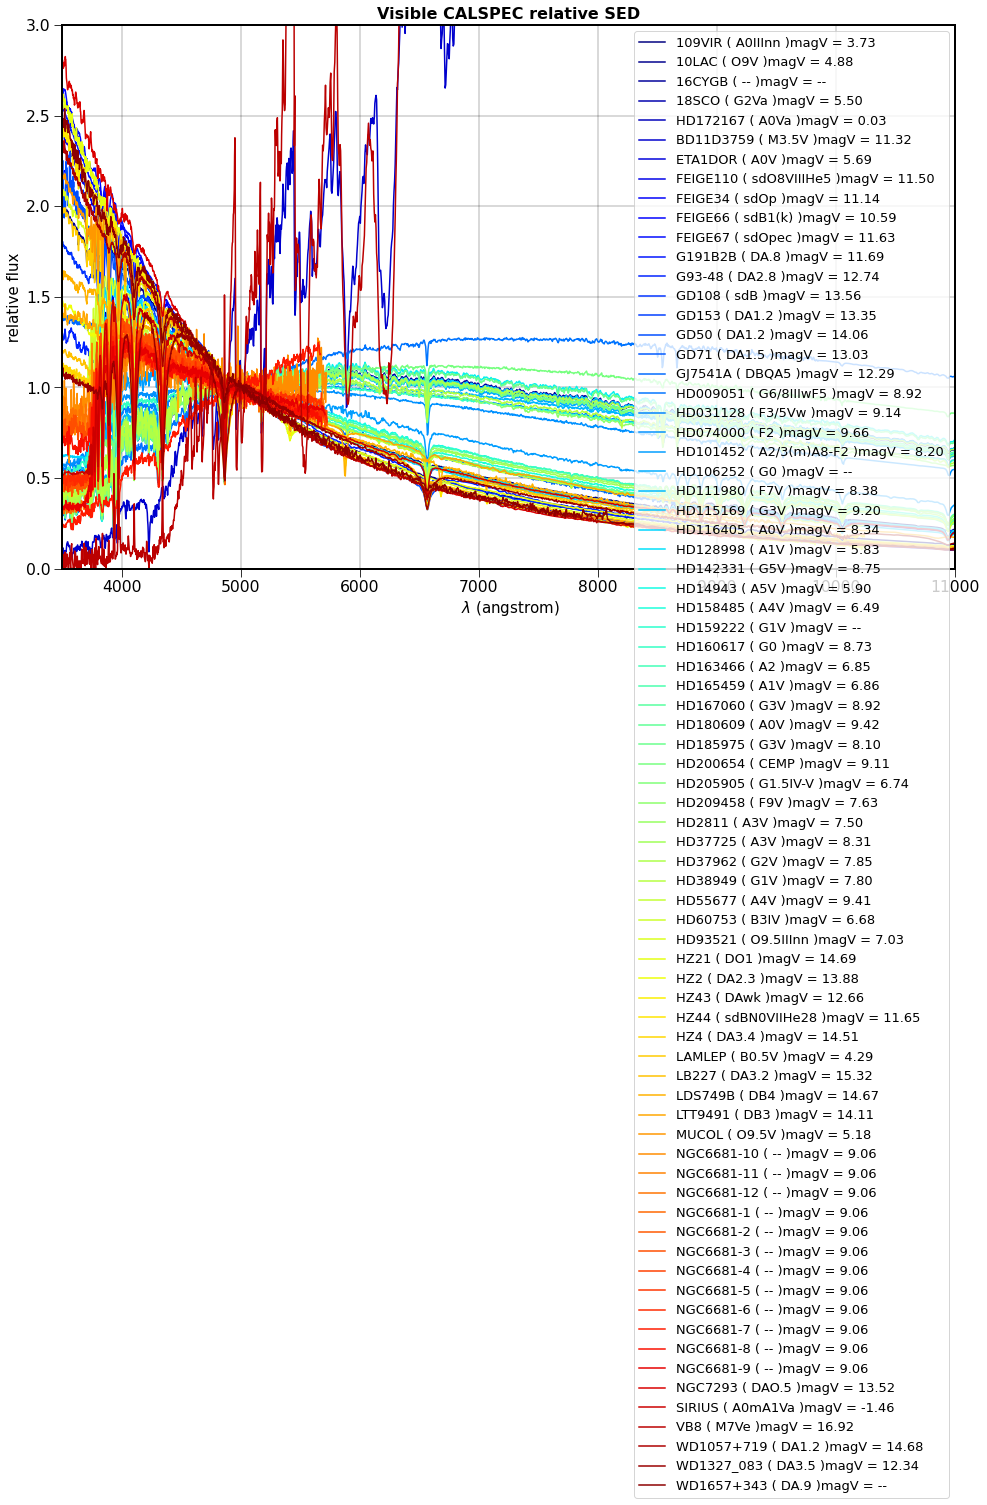

In [18]:
idx=0
for filename in t["FILES"]:
    
    if FLAG_VISIBILITY[idx]: 
        fullfilename=os.path.join(path_sed_calspec,filename)
        spec=S.FileSpectrum(fullfilename)
    
        spec.convert('photlam')
        #spec.convert('nm')    
        
        wl_idx=np.argmin(np.abs(spec.wave-5000))
        
        #label=t["OBJNAME"][idx]+" ( "+t["SP_TYPE"][idx]+" )"
        
        magV=t["magV"][idx]
        label=str(t["OBJNAME"][idx]) +" ( "+ str(t["SP_TYPE"][idx]) +" )" + "magV = {:1.2f}".format(magV)
        
        plt.plot(spec.wave, spec.flux/spec.flux[wl_idx],color=all_colors[idx],label=label)
        
    idx+=1
    
plt.xlim(3500.,11000.)
plt.ylim(0.,3.)
plt.legend()
plt.grid()

fign="all_viscalspec_relspectra_lin.png"
xlabel=' $\\lambda$ ({})'.format(spec.waveunits.name)
ylabel=' relative flux '
plt.xlabel(xlabel,fontsize=15)
plt.ylabel(ylabel,fontsize=15)
plt.title("Visible CALSPEC relative SED")
plt.grid(color="k")
plt.savefig(fign)

Warning, 26 of 6260 bins contained negative fluxes; they have been set to zero.


/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_61119/3682493874.py:13: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  label=str(t["OBJNAME"][idx]) +" ( "+ str(t["SP_TYPE"][idx]) +" )" + "magV = {:1.2f}".format(magV)


Warning, 27 of 6262 bins contained negative fluxes; they have been set to zero.
Warning, 27 of 1933 bins contained negative fluxes; they have been set to zero.
Warning, 17 of 6234 bins contained negative fluxes; they have been set to zero.
Warning, 1 of 6256 bins contained negative fluxes; they have been set to zero.
Warning, 29 of 6262 bins contained negative fluxes; they have been set to zero.


/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_61119/3682493874.py:13: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  label=str(t["OBJNAME"][idx]) +" ( "+ str(t["SP_TYPE"][idx]) +" )" + "magV = {:1.2f}".format(magV)


Warning, 64 of 6262 bins contained negative fluxes; they have been set to zero.
Warning, 62 of 6262 bins contained negative fluxes; they have been set to zero.
Warning, 34 of 7206 bins contained negative fluxes; they have been set to zero.
Warning, 6 of 7206 bins contained negative fluxes; they have been set to zero.
Warning, 18 of 6261 bins contained negative fluxes; they have been set to zero.


/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_61119/3682493874.py:13: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  label=str(t["OBJNAME"][idx]) +" ( "+ str(t["SP_TYPE"][idx]) +" )" + "magV = {:1.2f}".format(magV)


Warning, 47 of 7207 bins contained negative fluxes; they have been set to zero.
Warning, 30 of 6673 bins contained negative fluxes; they have been set to zero.
Warning, 46 of 6262 bins contained negative fluxes; they have been set to zero.
Warning, 64 of 7206 bins contained negative fluxes; they have been set to zero.
Warning, 28 of 6262 bins contained negative fluxes; they have been set to zero.
Warning, 9 of 6261 bins contained negative fluxes; they have been set to zero.
Warning, 33 of 7206 bins contained negative fluxes; they have been set to zero.
Warning, 57 of 7167 bins contained negative fluxes; they have been set to zero.
Warning, 26 of 6260 bins contained negative fluxes; they have been set to zero.
Warning, 5 of 6262 bins contained negative fluxes; they have been set to zero.
Warning, 12 of 7207 bins contained negative fluxes; they have been set to zero.
Warning, 1 of 2784 bins contained negative fluxes; they have been set to zero.
Warning, 5 of 2771 bins contained negative 

/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_61119/3682493874.py:13: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  label=str(t["OBJNAME"][idx]) +" ( "+ str(t["SP_TYPE"][idx]) +" )" + "magV = {:1.2f}".format(magV)


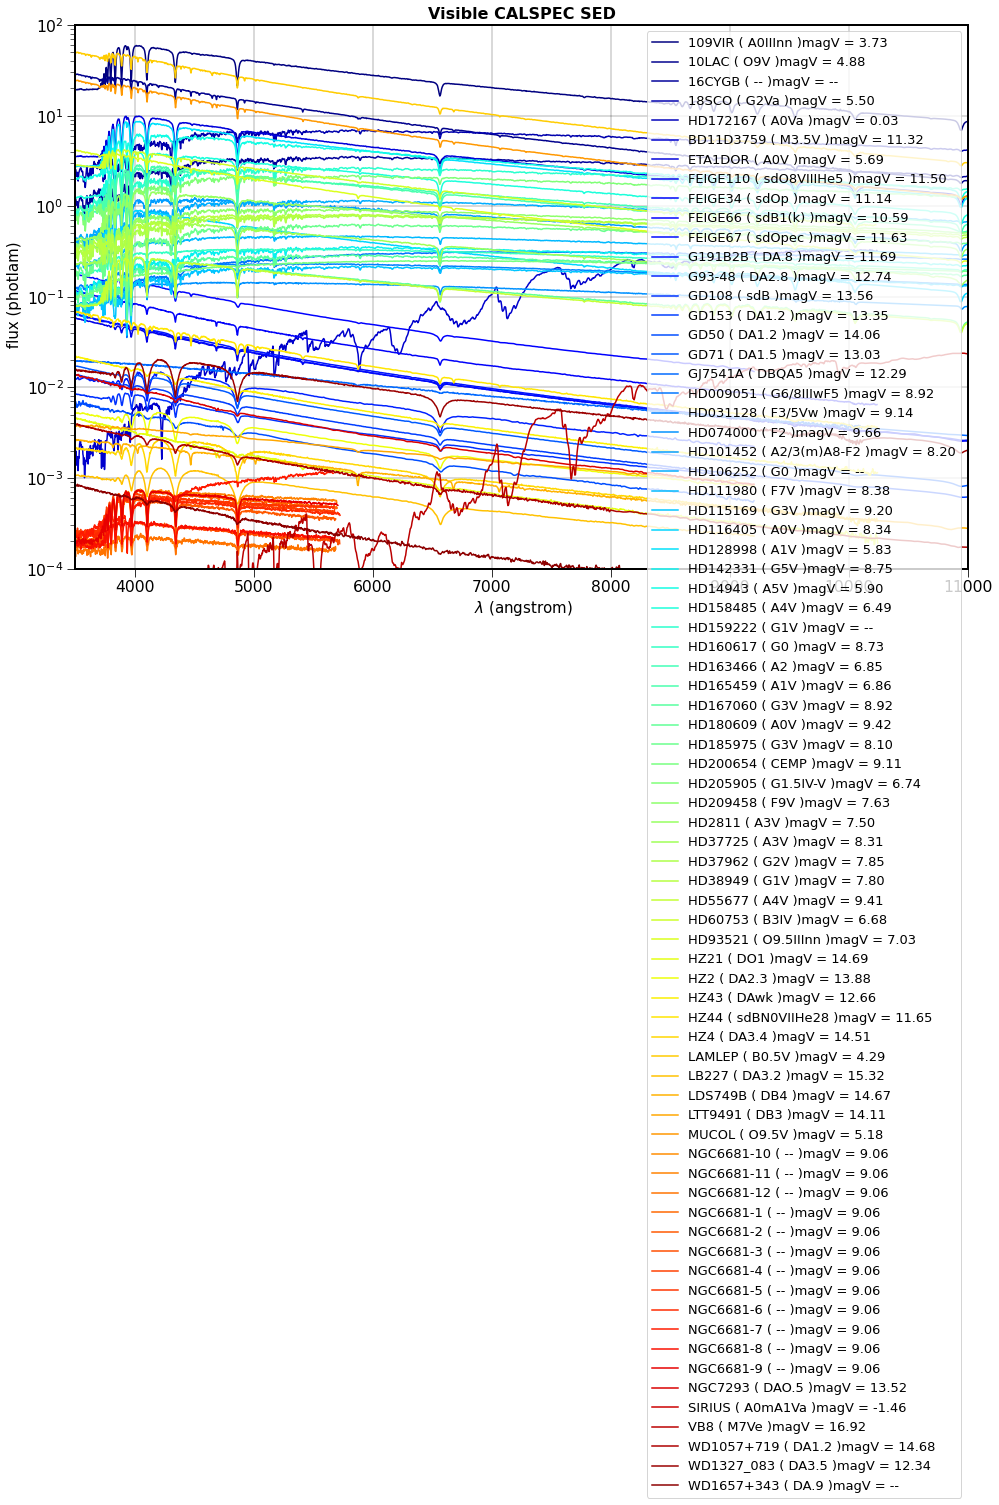

In [19]:
idx=0
for filename in t["FILES"]:
    
    if FLAG_VISIBILITY[idx]: 
        fullfilename=os.path.join(path_sed_calspec,filename)
        spec=S.FileSpectrum(fullfilename)
    
        spec.convert('photlam')
        #spec.convert('nm')     Never convert in nm !!!!!
        
        #label=t["OBJNAME"][idx]+" ( "+t["SP_TYPE"][idx]+" )"
        magV=t["magV"][idx]
        label=str(t["OBJNAME"][idx]) +" ( "+ str(t["SP_TYPE"][idx]) +" )" + "magV = {:1.2f}".format(magV)
            
        plt.semilogy(spec.wave, spec.flux,color=all_colors[idx],label=label)
        
    idx+=1
    
plt.xlim(3500.,11000.)
plt.ylim(.0001,100.)
#plt.ylim(0.,1.)
plt.legend()
plt.grid()

fign="all_viscalspec_spectra_log.png"
xlabel=' $\\lambda$ ({})'.format(spec.waveunits.name)
ylabel=' flux ({})'.format(spec.fluxunits.name)
plt.xlabel(xlabel,fontsize=15)
plt.ylabel(ylabel,fontsize=15)
plt.title("Visible CALSPEC SED")
plt.grid(color="k")
plt.savefig(fign)

# Define Johnson Filters

In [20]:
bp_v = S.ObsBandpass('johnson,v')
bp_u = S.ObsBandpass('johnson,u')
bp_b = S.ObsBandpass('johnson,b')
bp_r = S.ObsBandpass('johnson,r')
bp_i = S.ObsBandpass('johnson,i')

In [21]:
all_johnsonfilters=[bp_u,bp_b,bp_v,bp_r,bp_i]

In [22]:
bp_filter_color=["blue","green","orange","red","grey"]
bp_filter_bands=[bp_u,bp_b,bp_v,bp_r,bp_i]
bp_filter_name=["john U","john B","john V","john R","john I"]

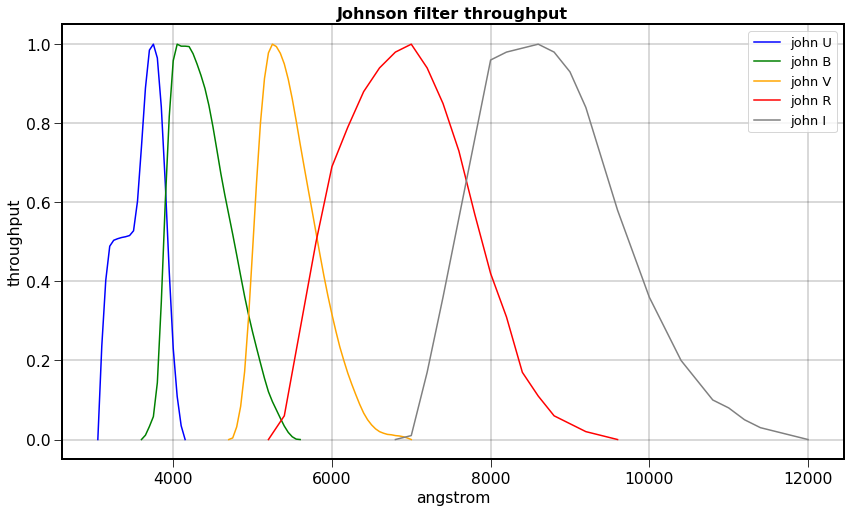

In [23]:
plt.figure(figsize=(14,8))
idx=0
for bp in all_johnsonfilters:
    plt.plot(bp.wave,bp.throughput,color=bp_filter_color[idx],label=bp_filter_name[idx])
    idx+=1
plt.grid(True,color="k")
plt.xlabel(bp.waveunits)
plt.ylabel('throughput')
plt.title("Johnson filter throughput")
plt.legend()

# Compute observations and Colors through Johnson filters

The goal is to recalculate the magnitudes with pysynphot using Johnson filters

## Create a Flat SED

In [24]:
flatsp = S.FlatSpectrum(10, fluxunits='photlam')
flatsp.convert('photlam')
flatsp_norm = flatsp.renorm(10, 'vegamag', S.ObsBandpass('johnson,v'))

In [25]:
idx=0
flatsp_mag=np.zeros(len(all_johnsonfilters))

for bp in all_johnsonfilters:

    obs=S.Observation(flatsp_norm,bp,force="taper")
    mag=obs.effstim('vegamag')
    
    flatsp_mag[idx]=mag
    idx+=1            

(/Users/sylvie/MacOSX/External/PySynPhotData/grp/redcat/trds/comp/nonhst/johnson_u_004_syn.fits) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(/Users/sylvie/MacOSX/External/PySynPhotData/grp/redcat/trds/comp/nonhst/johnson_b_004_syn.fits) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(/Users/sylvie/MacOSX/External/PySynPhotData/grp/redcat/trds/comp/nonhst/johnson_v_004_syn.fits) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(/Users/sylvie/MacOSX/External/PySynPhotData/grp/redcat/trds/comp/nonhst/johnson_r_003_syn.fits) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(/Users/sylvie/MacOSX/External/PySynPhotData/grp/redcat/trds/comp/nonhst/johnson_i_003_syn.fits) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.


In [26]:
flatsp_mag

array([ 9.72121212, 10.36904253, 10.        ,  9.50053752,  9.00125688])

In [27]:
VmI=flatsp_mag[2]-flatsp_mag[-1]

In [28]:
VmI

0.9987431194359893

## Check with well known Vega

In [29]:
spec=S.Vega

In [30]:
idx=0
for bp in all_johnsonfilters:

    obs=S.Observation(spec,bp,force="taper")
    mag=obs.effstim('vegamag')
    
    print(idx," ",mag)
    idx+=1            

(/Users/sylvie/MacOSX/External/PySynPhotData/grp/redcat/trds/comp/nonhst/johnson_u_004_syn.fits) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
0   0.0
(/Users/sylvie/MacOSX/External/PySynPhotData/grp/redcat/trds/comp/nonhst/johnson_b_004_syn.fits) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
1   0.0
(/Users/sylvie/MacOSX/External/PySynPhotData/grp/redcat/trds/comp/nonhst/johnson_v_004_syn.fits) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
2   0.0
(/Users/sylvie/MacOSX/External/PySynPhotData/grp/redcat/trds/comp/nonhst/johnson_r_003_syn.fits) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
3   0.0
(/Users/sylvie/MacOSX/External/PySynPhotData/grp/redcat/trds/comp/nonhst/johnson_i_003_syn.fits) does not have a defined binset in the wavecat table. The waveset of the

## Apply to SED in tables

In [31]:
idx=0

all_obs=[]
all_magnitudes=[]

for filename in t["FILES"]:
    
    if FLAG_VISIBILITY[idx]: 
        fullfilename=os.path.join(path_sed_calspec,filename)
        spec=S.FileSpectrum(fullfilename)
    
        spec.convert('photlam')
        #spec.convert('nm')    ## Never convert in nm
        
        objname=str(t["OBJNAME"][idx])
        
        print(objname)
        # loop on filters
        theobs=[]
        themag=[]
        for bp in all_johnsonfilters:
            if objname in [ "10LAC", "ALPHA_LYR"]:
                obs=S.Observation(spec,bp,force=None);
            else:
                obs=S.Observation(spec,bp,force="taper");
              
            
            theobs.append(obs)
            
            try:
                mag=obs.effstim('vegamag')
                themag.append(mag)
            except ValueError as err:
                print(f"Exception ValueError : {err}")
                themag.append(np.nan)
            
        # after loop on bp append the set to the collection of SED
        
        all_obs.append(theobs)
        all_magnitudes.append(themag)
            
           
    
    # next SED please    
    idx+=1

109VIR
(/Users/sylvie/MacOSX/External/PySynPhotData/grp/redcat/trds/comp/nonhst/johnson_u_004_syn.fits) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(/Users/sylvie/MacOSX/External/PySynPhotData/grp/redcat/trds/comp/nonhst/johnson_b_004_syn.fits) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(/Users/sylvie/MacOSX/External/PySynPhotData/grp/redcat/trds/comp/nonhst/johnson_v_004_syn.fits) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(/Users/sylvie/MacOSX/External/PySynPhotData/grp/redcat/trds/comp/nonhst/johnson_r_003_syn.fits) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(/Users/sylvie/MacOSX/External/PySynPhotData/grp/redcat/trds/comp/nonhst/johnson_i_003_syn.fits) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used in

(/Users/sylvie/MacOSX/External/PySynPhotData/grp/redcat/trds/comp/nonhst/johnson_i_003_syn.fits) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
FEIGE34
(/Users/sylvie/MacOSX/External/PySynPhotData/grp/redcat/trds/comp/nonhst/johnson_u_004_syn.fits) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(/Users/sylvie/MacOSX/External/PySynPhotData/grp/redcat/trds/comp/nonhst/johnson_b_004_syn.fits) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(/Users/sylvie/MacOSX/External/PySynPhotData/grp/redcat/trds/comp/nonhst/johnson_v_004_syn.fits) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(/Users/sylvie/MacOSX/External/PySynPhotData/grp/redcat/trds/comp/nonhst/johnson_r_003_syn.fits) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used i

(/Users/sylvie/MacOSX/External/PySynPhotData/grp/redcat/trds/comp/nonhst/johnson_i_003_syn.fits) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
GD71
(/Users/sylvie/MacOSX/External/PySynPhotData/grp/redcat/trds/comp/nonhst/johnson_u_004_syn.fits) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(/Users/sylvie/MacOSX/External/PySynPhotData/grp/redcat/trds/comp/nonhst/johnson_b_004_syn.fits) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(/Users/sylvie/MacOSX/External/PySynPhotData/grp/redcat/trds/comp/nonhst/johnson_v_004_syn.fits) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(/Users/sylvie/MacOSX/External/PySynPhotData/grp/redcat/trds/comp/nonhst/johnson_r_003_syn.fits) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used inst

(/Users/sylvie/MacOSX/External/PySynPhotData/grp/redcat/trds/comp/nonhst/johnson_r_003_syn.fits) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(/Users/sylvie/MacOSX/External/PySynPhotData/grp/redcat/trds/comp/nonhst/johnson_i_003_syn.fits) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
Warning, 64 of 6262 bins contained negative fluxes; they have been set to zero.
HD115169
(/Users/sylvie/MacOSX/External/PySynPhotData/grp/redcat/trds/comp/nonhst/johnson_u_004_syn.fits) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(/Users/sylvie/MacOSX/External/PySynPhotData/grp/redcat/trds/comp/nonhst/johnson_b_004_syn.fits) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(/Users/sylvie/MacOSX/External/PySynPhotData/grp/redcat/trds/comp/nonhst/johnson_v_004_syn.fits) does not have 

(/Users/sylvie/MacOSX/External/PySynPhotData/grp/redcat/trds/comp/nonhst/johnson_b_004_syn.fits) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(/Users/sylvie/MacOSX/External/PySynPhotData/grp/redcat/trds/comp/nonhst/johnson_v_004_syn.fits) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(/Users/sylvie/MacOSX/External/PySynPhotData/grp/redcat/trds/comp/nonhst/johnson_r_003_syn.fits) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(/Users/sylvie/MacOSX/External/PySynPhotData/grp/redcat/trds/comp/nonhst/johnson_i_003_syn.fits) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
Warning, 47 of 7207 bins contained negative fluxes; they have been set to zero.
HD163466
(/Users/sylvie/MacOSX/External/PySynPhotData/grp/redcat/trds/comp/nonhst/johnson_u_004_syn.fits) does not have 

(/Users/sylvie/MacOSX/External/PySynPhotData/grp/redcat/trds/comp/nonhst/johnson_i_003_syn.fits) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
HD209458
(/Users/sylvie/MacOSX/External/PySynPhotData/grp/redcat/trds/comp/nonhst/johnson_u_004_syn.fits) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(/Users/sylvie/MacOSX/External/PySynPhotData/grp/redcat/trds/comp/nonhst/johnson_b_004_syn.fits) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(/Users/sylvie/MacOSX/External/PySynPhotData/grp/redcat/trds/comp/nonhst/johnson_v_004_syn.fits) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(/Users/sylvie/MacOSX/External/PySynPhotData/grp/redcat/trds/comp/nonhst/johnson_r_003_syn.fits) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used 

(/Users/sylvie/MacOSX/External/PySynPhotData/grp/redcat/trds/comp/nonhst/johnson_v_004_syn.fits) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(/Users/sylvie/MacOSX/External/PySynPhotData/grp/redcat/trds/comp/nonhst/johnson_r_003_syn.fits) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(/Users/sylvie/MacOSX/External/PySynPhotData/grp/redcat/trds/comp/nonhst/johnson_i_003_syn.fits) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
HZ21
(/Users/sylvie/MacOSX/External/PySynPhotData/grp/redcat/trds/comp/nonhst/johnson_u_004_syn.fits) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(/Users/sylvie/MacOSX/External/PySynPhotData/grp/redcat/trds/comp/nonhst/johnson_b_004_syn.fits) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used inst

(/Users/sylvie/MacOSX/External/PySynPhotData/grp/redcat/trds/comp/nonhst/johnson_v_004_syn.fits) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(/Users/sylvie/MacOSX/External/PySynPhotData/grp/redcat/trds/comp/nonhst/johnson_r_003_syn.fits) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(/Users/sylvie/MacOSX/External/PySynPhotData/grp/redcat/trds/comp/nonhst/johnson_i_003_syn.fits) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
LTT9491
(/Users/sylvie/MacOSX/External/PySynPhotData/grp/redcat/trds/comp/nonhst/johnson_u_004_syn.fits) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(/Users/sylvie/MacOSX/External/PySynPhotData/grp/redcat/trds/comp/nonhst/johnson_b_004_syn.fits) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used i

Exception ValueError : Integrated flux is <= 0
Warning, 11 of 2788 bins contained negative fluxes; they have been set to zero.
NGC6681-3
(/Users/sylvie/MacOSX/External/PySynPhotData/grp/redcat/trds/comp/nonhst/johnson_u_004_syn.fits) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(/Users/sylvie/MacOSX/External/PySynPhotData/grp/redcat/trds/comp/nonhst/johnson_b_004_syn.fits) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(/Users/sylvie/MacOSX/External/PySynPhotData/grp/redcat/trds/comp/nonhst/johnson_v_004_syn.fits) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(/Users/sylvie/MacOSX/External/PySynPhotData/grp/redcat/trds/comp/nonhst/johnson_r_003_syn.fits) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(/Users/sylvie/MacOSX/External/PySynPhotData/grp/redcat/trds/co

(/Users/sylvie/MacOSX/External/PySynPhotData/grp/redcat/trds/comp/nonhst/johnson_u_004_syn.fits) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(/Users/sylvie/MacOSX/External/PySynPhotData/grp/redcat/trds/comp/nonhst/johnson_b_004_syn.fits) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(/Users/sylvie/MacOSX/External/PySynPhotData/grp/redcat/trds/comp/nonhst/johnson_v_004_syn.fits) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(/Users/sylvie/MacOSX/External/PySynPhotData/grp/redcat/trds/comp/nonhst/johnson_r_003_syn.fits) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(/Users/sylvie/MacOSX/External/PySynPhotData/grp/redcat/trds/comp/nonhst/johnson_i_003_syn.fits) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.


In [32]:
all_magnitudes=np.array(all_magnitudes)

In [33]:
all_magnitudes.shape

(75, 5)

In [34]:
all_magnitudes

array([[ 3.64888787,  3.68582857,  3.69234351,  3.68125954,  3.66386608],
       [ 3.60891289,  4.64837788,  4.84522421,  4.94619992,  5.1085456 ],
       [ 7.067905  ,  6.86860772,  6.20203021,  5.72662255,  5.40710155],
       [ 6.27157229,  6.10714408,  5.4626629 ,  5.00030948,  4.68333896],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [14.01605458, 12.87352885, 11.29427893,  9.48446628,  8.08145938],
       [ 5.56498136,  5.64620286,  5.66514041,  5.67852931,  5.69615542],
       [10.35884624, 11.52378987, 11.81461808, 11.98578026, 12.21514834],
       [ 9.60962586, 10.83053084, 11.15154056, 11.31619893, 11.54264512],
       [ 9.12337977, 10.22454511, 10.48709242, 10.64236129, 11.09636225],
       [10.2560411 , 11.47787912, 11.81125165, 11.98695287, 12.46292729],
       [10.24600409, 11.45448087, 11.76055829, 11.94201006, 12.18898079],
       [11.98189809, 12.71749394, 12.72828673, 12.83644269, 13.23429836],
       [12.41239386, 13.3471639 , 13.5

## Compute the renormalisation factor to get Magnitude 10

In [35]:
factor=np.power(10,(all_magnitudes[:,2]-10.0)/2.5)

In [36]:
t["calcU"]=all_magnitudes[:,0]
t["calcB"]=all_magnitudes[:,1]
t["calcV"]=all_magnitudes[:,2]
t["calcR"]=all_magnitudes[:,3]
t["calcI"]=all_magnitudes[:,4]
t["factor"]=factor

In [37]:
t["calcU"].info.format ='5.3f'
t["calcB"].info.format ='5.3f'
t["calcV"].info.format ='5.3f'
t["calcR"].info.format ='5.3f'
t["calcI"].info.format ='5.3f'
t["factor"].info.format ='6.5g'

## Add the Flat spectrum

In [38]:
t.add_row(['FLAT',0 ,0, 'flat' ,'0',flatsp_mag[0], flatsp_mag[1],flatsp_mag[2],flatsp_mag[3],flatsp_mag[4],'flat',flatsp_mag[0], flatsp_mag[1],flatsp_mag[2],flatsp_mag[3],flatsp_mag[4],1.0 ])

In [39]:
NBFILES=len(t)
NBOBJ=len(t)

In [40]:
FLAG_VISIBILITY= [True] * (NBOBJ)

In [41]:
# wavelength bin colors
jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=NBFILES)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(np.arange(NBFILES), alpha=1)

# Sort according color

In [42]:
t["VmI"]=t["calcV"]-t["calcI"]
t.sort("VmI")

In [43]:
t.show_in_notebook()  

idx,OBJNAME,RA,DEC,SP_TYPE,SP_QUAL,magU,magB,magV,magR,magI,FILES,calcU,calcB,calcV,calcR,calcI,factor,VmI
0,NGC7293,337.411,-20.837,DAO.5,C,11.894,13.158,13.524,13.689,13.898,ngc7293_005.fits,11.917,13.180,13.538,13.734,14.234,26.01,-0.697
1,FEIGE67,190.466,17.522,sdOpec,D,10.261,11.700,11.630,11.969,12.159,feige67_002.fits,10.256,11.478,11.811,11.987,12.463,5.3027,-0.652
2,GD50,57.209,-0.976,DA1.2,C,12.596,13.787,14.063,14.210,14.388,gd50_004.fits,12.674,13.817,14.043,14.217,14.674,41.416,-0.631
3,FEIGE66,189.348,25.067,sdB1(k),C,9.117,10.260,10.590,10.642,10.809,feige66_002.fits,9.123,10.225,10.487,10.642,11.096,1.5662,-0.609
4,GD108,150.197,-7.559,sdB,D,12.406,13.349,13.563,13.662,13.781,gd108_005.fits,12.412,13.347,13.558,13.659,14.073,26.488,-0.516
5,G93-48,328.106,2.389,DA2.8,C,11.942,12.732,12.743,12.839,12.938,g93_48_004.fits,11.982,12.717,12.728,12.836,13.234,12.34,-0.506
6,HZ2,63.181,11.864,DA2.3,C,12.903,13.787,13.877,13.984,14.094,hz2_005.fits,12.943,13.792,13.849,13.949,14.339,34.649,-0.490
7,HZ44,200.897,36.133,sdBN0VIIHe28,B,10.186,11.420,11.650,12.000,11.995,hz44_stis_006.fits,10.182,11.363,11.637,11.816,12.102,4.5175,-0.464
8,HZ21,183.484,32.942,DO1,C,13.125,14.361,14.688,14.837,15.038,hz21_stis_006.fits,13.130,14.353,14.662,14.839,15.123,73.268,-0.461
9,HZ43,199.091,29.099,DAwk,D,--,12.520,12.660,--,--,hz43_stis_005.fits,11.417,12.608,12.895,13.072,13.347,14.392,-0.452


In [44]:
t.write('table_summary_allcalspec_torenorm.fits', overwrite=True)  

# Plot renormalised spectra to Magnitude 10

## Spectra renormalised by calculation and by hand

0 )  ngc7293_005.fits
1 )  feige67_002.fits
2 )  gd50_004.fits
3 )  feige66_002.fits
4 )  gd108_005.fits
5 )  g93_48_004.fits
6 )  hz2_005.fits
7 )  hz44_stis_006.fits
8 )  hz21_stis_006.fits
9 )  hz43_stis_005.fits
10 )  g191b2b_stiswfcnic_003.fits
11 )  lb227_004.fits
12 )  gd153_stiswfcnic_003.fits
13 )  wd1057_719_stisnic_008.fits
14 )  feige110_stisnic_008.fits
15 )  wd1657_343_stiswfcnic_004.fits


/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_61119/3814659293.py:15: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  label=str(t["OBJNAME"][idx]) +" ( "+ str(t["SP_TYPE"][idx]) +" )"+"magV = {:1.2f}".format(magV)


16 )  gd71_stiswfcnic_003.fits
17 )  feige34_stis_006.fits
18 )  mucol_stis_005.fits
19 )  lamlep_stis_005.fits
20 )  hd93521_stis_006.fits
21 )  10lac_stis_005.fits
22 )  hz4_stis_007.fits
23 )  ltt9491_002.fits
24 )  wd1327_083_stiswfc_004.fits
25 )  hd60753_stis_004.fits
26 )  lds749b_stisnic_008.fits
27 )  hd116405_stis_005.fits
28 )  eta1dor_stis_002.fits
29 )  sirius_stis_004.fits
30 )  alpha_lyr_stis_010.fits
31 )  hd128998_stis_002.fits
32 )  109vir_stis_002.fits
33 )  gj7541a_stis_004.fits
34 )  hd165459_stisnic_005.fits
Warning, 30 of 6673 bins contained negative fluxes; they have been set to zero.
35 )  hd55677_stis_002.fits
Warning, 12 of 7207 bins contained negative fluxes; they have been set to zero.
36 )  hd180609_stis_005.fits
Warning, 64 of 7206 bins contained negative fluxes; they have been set to zero.
37 )  hd158485_stis_005.fits
Warning, 6 of 7206 bins contained negative fluxes; they have been set to zero.
38 )  hd37725_stiswfc_003.fits
Warning, 57 of 7167 bins con

/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_61119/3814659293.py:15: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  label=str(t["OBJNAME"][idx]) +" ( "+ str(t["SP_TYPE"][idx]) +" )"+"magV = {:1.2f}".format(magV)


50 )  hd159222_stis_005.fits
Warning, 18 of 6261 bins contained negative fluxes; they have been set to zero.


/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_61119/3814659293.py:15: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  label=str(t["OBJNAME"][idx]) +" ( "+ str(t["SP_TYPE"][idx]) +" )"+"magV = {:1.2f}".format(magV)


51 )  hd111980_stis_005.fits
52 )  hd167060_stis_002.fits
Warning, 46 of 6262 bins contained negative fluxes; they have been set to zero.
53 )  18sco_stis_002.fits
Warning, 27 of 6262 bins contained negative fluxes; they have been set to zero.
54 )  hd37962_stis_005.fits
Warning, 26 of 6260 bins contained negative fluxes; they have been set to zero.
55 )  hd115169_stis_002.fits
Warning, 64 of 6262 bins contained negative fluxes; they have been set to zero.
56 )  16cygb_stis_002.fits
Warning, 26 of 6260 bins contained negative fluxes; they have been set to zero.


/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_61119/3814659293.py:15: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  label=str(t["OBJNAME"][idx]) +" ( "+ str(t["SP_TYPE"][idx]) +" )"+"magV = {:1.2f}".format(magV)


57 )  hd185975_stis_005.fits
Warning, 28 of 6262 bins contained negative fluxes; they have been set to zero.
58 )  hd142331_stis_002.fits
Warning, 62 of 6262 bins contained negative fluxes; they have been set to zero.
59 )  hd200654_stis_005.fits
60 )  flat
61 )  hd009051_stis_005.fits
Warning, 17 of 6234 bins contained negative fluxes; they have been set to zero.
62 )  bd11d3759_stis_002.fits
Warning, 27 of 1933 bins contained negative fluxes; they have been set to zero.
63 )  vb8_stiswfcnic_003.fits
Warning, 116 of 2334 bins contained negative fluxes; they have been set to zero.
64 )  ngc6681_1_stis_001.fits
Warning, 137 of 2781 bins contained negative fluxes; they have been set to zero.
65 )  ngc6681_2_stis_001.fits
Warning, 41 of 2777 bins contained negative fluxes; they have been set to zero.
66 )  ngc6681_3_stis_001.fits
Warning, 11 of 2788 bins contained negative fluxes; they have been set to zero.
67 )  ngc6681_4_stis_001.fits
Warning, 26 of 2771 bins contained negative fluxes;

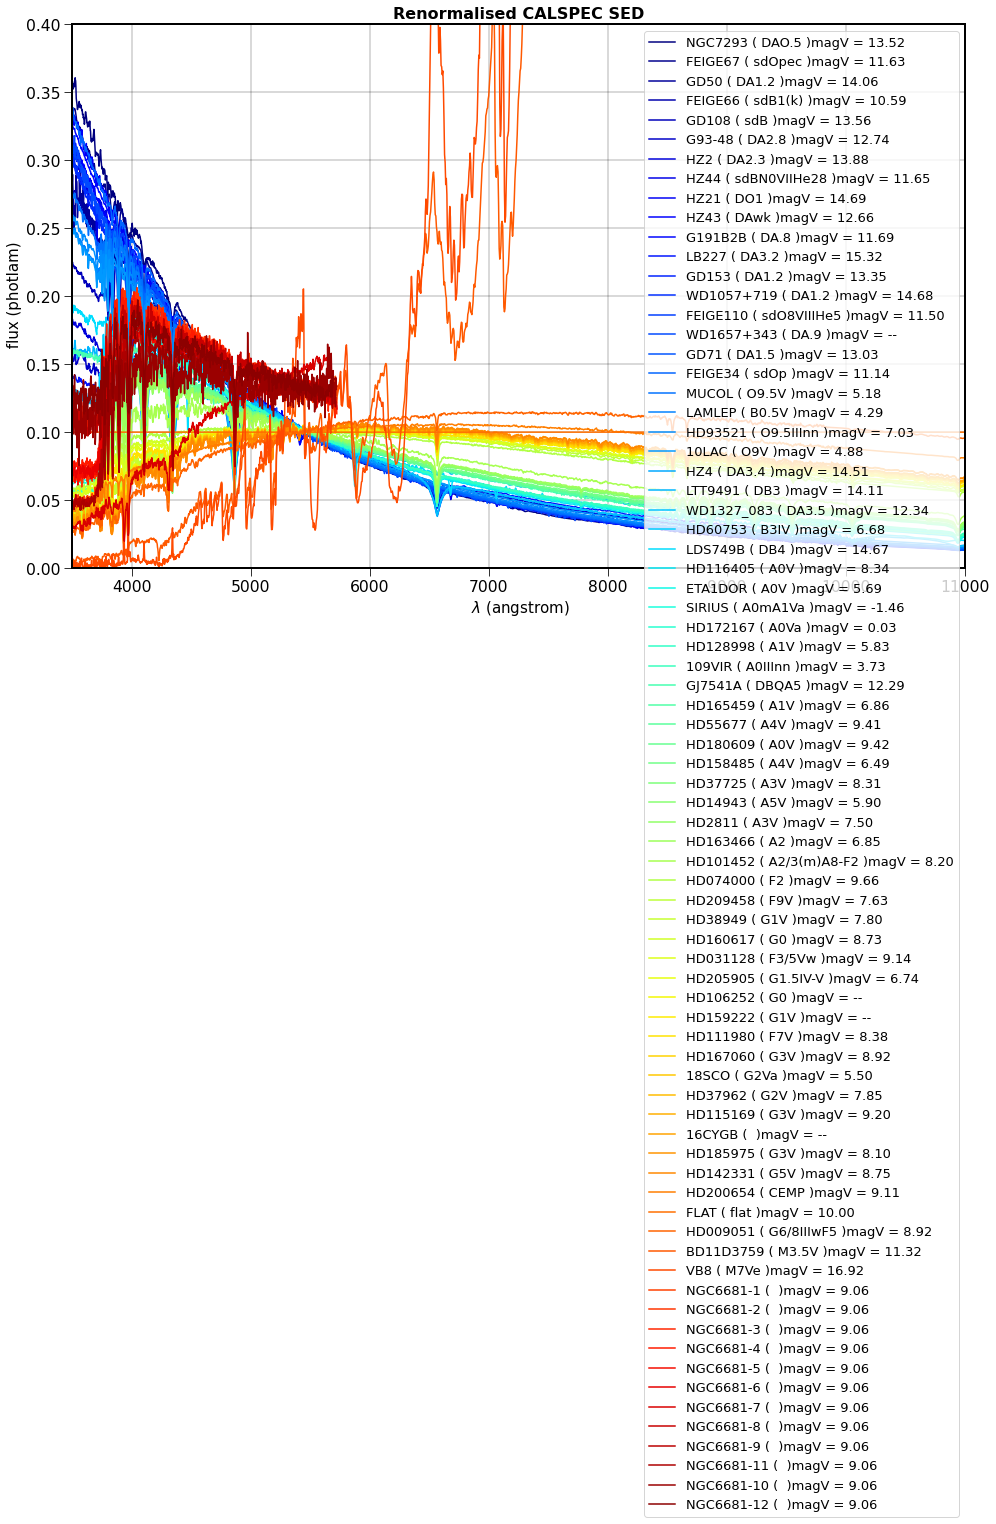

In [45]:
idx=0
for filename in t["FILES"]:
    print(idx,") ",filename)
    if FLAG_VISIBILITY[idx]: 
        
        if filename=="flat":
            spec=flatsp_norm
        else:
            fullfilename=os.path.join(path_sed_calspec,filename)
            spec=S.FileSpectrum(fullfilename) 
            spec.convert('photlam') 
        
        #label=t["OBJNAME"][idx]+" ( "+t["SP_TYPE"][idx]+" )"
        magV=t["magV"][idx]
        label=str(t["OBJNAME"][idx]) +" ( "+ str(t["SP_TYPE"][idx]) +" )"+"magV = {:1.2f}".format(magV)
            
        plt.plot(spec.wave, spec.flux*t["factor"][idx],color=all_colors[idx],label=label)
        
    idx+=1
    
    
#plt.plot(flatsp_norm.wave,flatsp_norm.flux,color="k",label="FLAT") 

plt.xlim(3500.,11000.)
#plt.ylim(.0001,100.)
plt.ylim(0.,.4)
plt.legend()
plt.grid()

fign="all_viscalspec_spectra_lin_renorm.png"
xlabel=' $\\lambda$ ({})'.format(spec.waveunits.name)
ylabel=' flux ({})'.format(spec.fluxunits.name)
plt.xlabel(xlabel,fontsize=15)
plt.ylabel(ylabel,fontsize=15)
plt.title("Renormalised CALSPEC SED")
plt.grid(color="k")
plt.savefig(fign)

## Spectra renormalised by pysynphot

/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_61119/2145453656.py:17: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  label= str(t["OBJNAME"][idx]) +" ( "+  str(t["SP_TYPE"][idx]) +" )" + "magV = {:1.2f}".format(magV)


Warning, 30 of 6673 bins contained negative fluxes; they have been set to zero.
Warning, 12 of 7207 bins contained negative fluxes; they have been set to zero.
Warning, 64 of 7206 bins contained negative fluxes; they have been set to zero.
Warning, 6 of 7206 bins contained negative fluxes; they have been set to zero.
Warning, 57 of 7167 bins contained negative fluxes; they have been set to zero.
Warning, 34 of 7206 bins contained negative fluxes; they have been set to zero.
Warning, 33 of 7206 bins contained negative fluxes; they have been set to zero.
Warning, 47 of 7207 bins contained negative fluxes; they have been set to zero.
Warning, 5 of 6262 bins contained negative fluxes; they have been set to zero.
Warning, 1 of 6256 bins contained negative fluxes; they have been set to zero.
Warning, 9 of 6261 bins contained negative fluxes; they have been set to zero.
Warning, 29 of 6262 bins contained negative fluxes; they have been set to zero.


/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_61119/2145453656.py:17: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  label= str(t["OBJNAME"][idx]) +" ( "+  str(t["SP_TYPE"][idx]) +" )" + "magV = {:1.2f}".format(magV)


Warning, 18 of 6261 bins contained negative fluxes; they have been set to zero.


/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_61119/2145453656.py:17: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  label= str(t["OBJNAME"][idx]) +" ( "+  str(t["SP_TYPE"][idx]) +" )" + "magV = {:1.2f}".format(magV)


Warning, 46 of 6262 bins contained negative fluxes; they have been set to zero.
Warning, 27 of 6262 bins contained negative fluxes; they have been set to zero.
Warning, 26 of 6260 bins contained negative fluxes; they have been set to zero.
Warning, 64 of 6262 bins contained negative fluxes; they have been set to zero.
Warning, 26 of 6260 bins contained negative fluxes; they have been set to zero.


/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_61119/2145453656.py:17: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  label= str(t["OBJNAME"][idx]) +" ( "+  str(t["SP_TYPE"][idx]) +" )" + "magV = {:1.2f}".format(magV)


Warning, 28 of 6262 bins contained negative fluxes; they have been set to zero.
Warning, 62 of 6262 bins contained negative fluxes; they have been set to zero.
Warning, 17 of 6234 bins contained negative fluxes; they have been set to zero.
Warning, 27 of 1933 bins contained negative fluxes; they have been set to zero.
Warning, 116 of 2334 bins contained negative fluxes; they have been set to zero.
Warning, 137 of 2781 bins contained negative fluxes; they have been set to zero.
Warning, 41 of 2777 bins contained negative fluxes; they have been set to zero.
Warning, 11 of 2788 bins contained negative fluxes; they have been set to zero.
Warning, 26 of 2771 bins contained negative fluxes; they have been set to zero.
Warning, 28 of 2769 bins contained negative fluxes; they have been set to zero.
Warning, 16 of 2787 bins contained negative fluxes; they have been set to zero.
Warning, 919 of 2788 bins contained negative fluxes; they have been set to zero.
Warning, 8 of 2767 bins contained neg

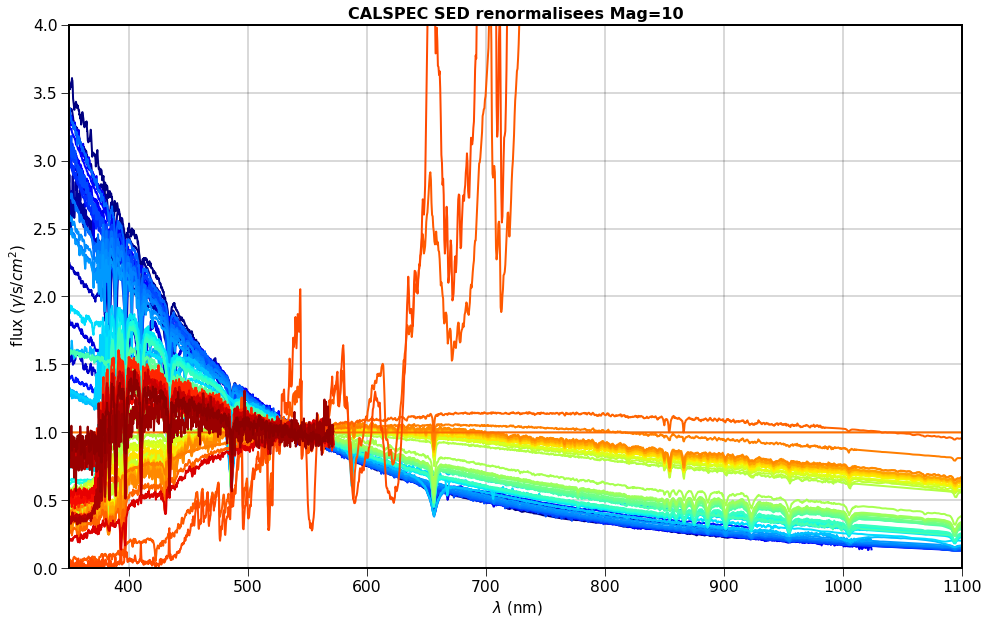

In [46]:
idx=0
for filename in t["FILES"]:
    
    if FLAG_VISIBILITY[idx]: 
        
                
        if filename=="flat":
            spec=flatsp_norm
        else:
            fullfilename=os.path.join(path_sed_calspec,filename)
            spec=S.FileSpectrum(fullfilename)
    
            spec.convert('photlam')
        
        #label=str(idx)+ ") "+t["OBJNAME"][idx]+" ( "+t["SP_TYPE"][idx]+" )" 
        magV= t["magV"][idx]
        label= str(t["OBJNAME"][idx]) +" ( "+  str(t["SP_TYPE"][idx]) +" )" + "magV = {:1.2f}".format(magV)
        
        sp_norm = spec.renorm(10, 'vegamag', S.ObsBandpass('johnson,v'),force=True)
        
        plt.plot(sp_norm.wave/10, sp_norm.flux*10,color=all_colors[idx],label=label,lw=2)
        
    idx+=1

#plt.plot(flatsp_norm.wave,flatsp_norm.flux,color="k",label="FLAT")     
    
plt.xlim(350.,1100.)
#plt.ylim(.0001,100.)
plt.ylim(0.,4.0)
#plt.legend()
plt.grid()

fign="all_viscalspec_spectra_lin_renorm2.png"
xlabel=' $\\lambda$ ({})'.format("nm")
ylabel=' flux ({})'.format("$\gamma$/s/$cm^2$")
plt.xlabel(xlabel,fontsize=15)
plt.ylabel(ylabel,fontsize=15)
plt.title("CALSPEC SED renormalisees Mag=10")
plt.grid(color="k")
plt.savefig(fign)


# Conclusion:

Let PySynphot renormalise spectra itself

In [47]:
t.remove_column("SP_QUAL")
t.remove_column("magU")
t.remove_column("magB")
t.remove_column("magV")
t.remove_column("magR")
t.remove_column("magI")
t.remove_column("FILES")
t.remove_column("factor")                

In [48]:
t.show_in_notebook()

idx,OBJNAME,RA,DEC,SP_TYPE,calcU,calcB,calcV,calcR,calcI,VmI
0,NGC7293,337.411,-20.837,DAO.5,11.917,13.180,13.538,13.734,14.234,-0.697
1,FEIGE67,190.466,17.522,sdOpec,10.256,11.478,11.811,11.987,12.463,-0.652
2,GD50,57.209,-0.976,DA1.2,12.674,13.817,14.043,14.217,14.674,-0.631
3,FEIGE66,189.348,25.067,sdB1(k),9.123,10.225,10.487,10.642,11.096,-0.609
4,GD108,150.197,-7.559,sdB,12.412,13.347,13.558,13.659,14.073,-0.516
5,G93-48,328.106,2.389,DA2.8,11.982,12.717,12.728,12.836,13.234,-0.506
6,HZ2,63.181,11.864,DA2.3,12.943,13.792,13.849,13.949,14.339,-0.490
7,HZ44,200.897,36.133,sdBN0VIIHe28,10.182,11.363,11.637,11.816,12.102,-0.464
8,HZ21,183.484,32.942,DO1,13.130,14.353,14.662,14.839,15.123,-0.461
9,HZ43,199.091,29.099,DAwk,11.417,12.608,12.895,13.072,13.347,-0.452
